In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as scs
import scipy.linalg as spla
import mplcursors

In [2]:
parquet_file = r'./data/data_synced.parquet'

In [3]:
df = pd.read_parquet(parquet_file)

In [4]:
df_filtered = df.drop(['T1E_x', 'T1E_y', 'T1E_z'], axis=1)
df_filtered = df_filtered.drop(df.index[0:16*9*3600+30000])
df_filtered = df_filtered.drop(df.index[-1])
df_filtered = df_filtered.drop(df.index[16*10*3600:-1])
# df_filtered = df_filtered.fillna(0)

In [5]:
columns = list(df_filtered.columns)

print(columns)


['G1E_x', 'G1E_y', 'G1E_z', 'G1W_x', 'G1W_y', 'G1W_z', 'G2E_x', 'G2E_y', 'G2E_z', 'G2W_x', 'G2W_y', 'G2W_z', 'G3E_x', 'G3E_y', 'G3E_z', 'G3W_x', 'G3W_y', 'G3W_z', 'G4E_x', 'G4E_y', 'G4E_z', 'G4W_x', 'G4W_y', 'G4W_z', 'G5E_x', 'G5E_y', 'G5E_z', 'G5W_x', 'G5W_y', 'G5W_z', 'G6E_x', 'G6E_y', 'G6E_z', 'G6W_x', 'G6W_y', 'G6W_z', 'G7E_x', 'G7E_y', 'G7E_z', 'G7W_x', 'G7W_y', 'G7W_z', 'G8E_x', 'G8E_y', 'G8E_z', 'G8W_x', 'G8W_y', 'G8W_z', 'G9E_x', 'G9E_y', 'G9E_z', 'G9W_x', 'G9W_y', 'G9W_z', 'T1W_x', 'T1W_y', 'T1W_z']


In [6]:
df_filtered

,G1E_x,G1E_y,G1E_z,G1W_x,G1W_y,G1W_z,G2E_x,G2E_y,G2E_z,G2W_x,...,G8W_z,G9E_x,G9E_y,G9E_z,G9W_x,G9W_y,G9W_z,T1W_x,T1W_y,T1W_z
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-26 07:18:48.312500,-0.012280,0.020946,-1.003955,0.008431,-0.009502,-1.000149,-0.008566,0.007931,-1.005702,-0.012017,...,-1.002779,-0.016149,0.047033,-1.000523,0.020603,-0.004875,-1.000363,0.011984,0.077861,-0.999401
2023-10-26 07:18:48.375000,-0.012256,0.020255,-1.001810,0.008825,-0.009309,-1.002120,-0.007184,0.015955,-1.001796,-0.013765,...,-1.002326,-0.016427,0.048655,-0.999501,0.020366,-0.002885,-0.999459,0.013048,0.077586,-0.999427
2023-10-26 07:18:48.437500,-0.012048,0.020165,-1.001703,0.008845,-0.009244,-1.002192,-0.007328,0.016517,-0.997354,-0.011674,...,-1.001626,-0.016102,0.048757,-1.000978,0.020852,-0.003185,-1.003899,0.012798,0.077288,-0.998807
2023-10-26 07:18:48.500000,-0.012469,0.020450,-1.003003,0.008067,-0.009695,-1.000214,-0.008406,0.010023,-1.003723,-0.011517,...,-1.002458,-0.016357,0.046103,-1.003520,0.020770,-0.005217,-1.007205,0.012487,0.077479,-0.999713
2023-10-26 07:18:48.562500,-0.012280,0.018497,-1.004992,0.008175,-0.010621,-1.001254,-0.006941,0.025904,-0.999986,-0.011340,...,-1.003581,-0.016482,0.048745,-1.006911,0.020887,-0.002411,-1.005725,0.012475,0.077613,-0.998702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-26 07:47:33.000000,-0.011249,0.018814,-0.992613,0.008999,-0.008947,-0.992681,-0.006559,0.012286,-1.003975,-0.010509,...,-1.002416,-0.015713,0.049703,-1.002850,0.021163,-0.005425,-1.004223,0.010615,0.078746,-0.998627
2023-10-26 07:47:33.062500,-0.011886,0.019216,-0.992028,0.008848,-0.010293,-0.992258,-0.007148,0.015275,-1.001030,-0.011111,...,-1.002493,-0.016832,0.053534,-1.004339,0.020576,-0.000328,-1.001564,0.011230,0.078743,-0.999785
2023-10-26 07:47:33.125000,-0.013133,0.020610,-0.999523,0.007889,-0.008935,-1.000327,-0.007797,0.013528,-1.005295,-0.011300,...,-1.001688,-0.016977,0.050680,-0.999971,0.018968,-0.005071,-0.997030,0.011200,0.077991,-0.999104


In [7]:
df_filtered.shape

(27600, 57)

In [8]:
acceleration_data = df_filtered.to_numpy()

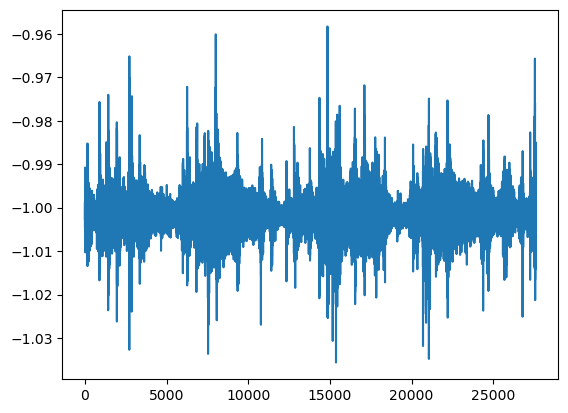

In [9]:
fs = 16
t = np.arange(0, len(acceleration_data))

plt.plot(t, acceleration_data[:,26])
plt.show()

In [10]:
acceleration_data = scs.detrend(acceleration_data, axis=0)

In [11]:
nperseg = 1000
zp = 8
nfft =  nperseg * zp

Sxy = np.array([[scs.csd(ch1, ch2, fs, nperseg=nperseg, nfft=nfft)[1] 
               for ch1 in acceleration_data.T] for ch2 in acceleration_data.T])

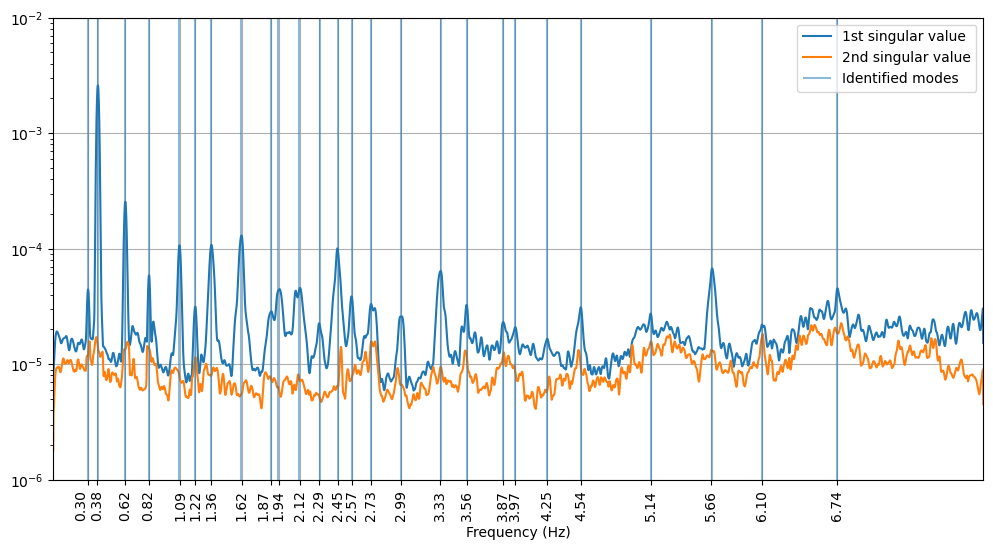

In [64]:
%matplotlib inline

w = np.linspace(0, fs/2, Sxy.shape[2])
n = acceleration_data.shape[1]

singular_values = np.zeros((n, len(w)))
singular_vector = np.zeros((n, len(w)), dtype=complex)

for k in range(len(w)):
    U, S, V = spla.svd(Sxy[..., k])

    singular_values[:, k] = S[0:n]
    singular_vector[:, k] = U[:,0]

peak_index, _ = scs.find_peaks(singular_values[0, :], height=0.007*np.max(singular_values[0, :]))
peak_index = np.delete(peak_index, [0])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(w, singular_values[0, :], label='1st singular value')
ax.plot(w, singular_values[1, :], label='2nd singular value')
ax.vlines(w[picked_freq], 1E-6, 1E-2, alpha=0.5, label="Identified modes")
ax.set_xticks(np.round(w[picked_freq], 2))
ticklabels = ax.get_xticklabels()
ticklabels[0].set_ha("right")
ticklabels[8].set_ha("right")
ax.set_yscale("log")
ax.set_ylim(1E-6, 1E-2)
ax.grid()
ax.set_xlim(0, 8)
ax.set_xlabel('Frequency (Hz)')
ax.legend()

plt.setp(ax.get_xticklabels(), rotation=90)

# plt.savefig("./pictures/fdd.svg")
plt.show()




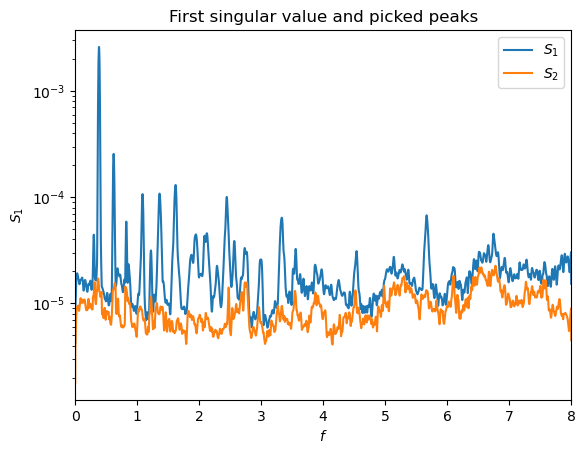

In [13]:
# %matplotlib widget

fig = plt.figure()
plt.plot(w, singular_values[0, :], label='$S_1$')
plt.plot(w, singular_values[1, :], label='$S_2$')
plt.yscale("log")
plt.xlim(0, 8)
plt.ylabel('$S_1$')
plt.xlabel('$f$')
plt.legend()
plt.title('First singular value and picked peaks')

points = []

# position = {'NW': 0, 'NE': 0, 'SE': 0, 'SW': 0}
cursor = mplcursors.cursor(hover=False)

@cursor.connect("add")
def cursor_clicked(sel):
    sel.annotation.set_text(
        f'Clicked on\nx: {sel.target[0]:.2f} y: {sel.target[1]:.2f}\nindex: {round(sel.index)}')
    points.append(round(sel.index))
    print(round(sel.index))
    # print("Current list of points:", points)

plt.show()

In [24]:
picked_freq = np.array([
    149,
    192,
    310,
    411,
    543,
    610,
    680,
    809,
    935,
    968,
    1059,
    1146,
    1223,
    1283,
    1367,
    1497,
    1666,
    1778,
    1935,
    1984,
    2123,
    2270,
    2569,
    2832,
    3048,
    3371,
 ])

In [15]:
w[picked_freq]

array([0.298, 0.384, 0.62 , 0.822, 1.086, 1.22 , 1.36 , 1.618, 1.87 ,
       1.936, 2.118, 2.292, 2.446, 2.566, 2.734, 2.994, 3.332, 3.556,
       3.87 , 3.968, 4.246, 4.54 , 5.138, 5.664, 6.096, 6.742])

In [16]:
modes = np.zeros((57, len(picked_freq)))

for k in range(picked_freq.shape[0]):
    modes[:, k] = singular_vector.real[:, picked_freq[k]]
    modes[:, k] = modes[:, k] / np.max(np.real(modes[:, k]))

In [17]:
# Export .csv files for dynamo
df_modes = pd.DataFrame(modes)
df_modes.to_csv('./results/dynamo/fdd_modes.csv', index=False, header=False, float_format='%.13f')

df_freq = pd.DataFrame(w[picked_freq])
df_freq.to_csv("./results/dynamo/fdd_freq.csv", index=False, header=False, float_format='%.13f')

In [18]:
indexed_freq_fdd = np.zeros((len(w[picked_freq]), 2))
indexed_freq_fdd[:,0] = np.array([i for i in range(1, len(w[picked_freq]) + 1)])
indexed_freq_fdd[:,1] = w[picked_freq]
indexed_freq_fdd

array([[ 1.   ,  0.298],
       [ 2.   ,  0.384],
       [ 3.   ,  0.62 ],
       [ 4.   ,  0.822],
       [ 5.   ,  1.086],
       [ 6.   ,  1.22 ],
       [ 7.   ,  1.36 ],
       [ 8.   ,  1.618],
       [ 9.   ,  1.87 ],
       [10.   ,  1.936],
       [11.   ,  2.118],
       [12.   ,  2.292],
       [13.   ,  2.446],
       [14.   ,  2.566],
       [15.   ,  2.734],
       [16.   ,  2.994],
       [17.   ,  3.332],
       [18.   ,  3.556],
       [19.   ,  3.87 ],
       [20.   ,  3.968],
       [21.   ,  4.246],
       [22.   ,  4.54 ],
       [23.   ,  5.138],
       [24.   ,  5.664],
       [25.   ,  6.096],
       [26.   ,  6.742]])

In [19]:
t1w = modes[54:, :]
modes = np.append(modes, t1w, 0)

ind = np.array([
    16.1, 16.2, 16.3,
    15.1, 15.2, 15.3,
    9.1,  9.2,  9.3,
    3.1,  3.2,  3.3,
    10.1, 10.2, 10.3,
    4.1,  4.2,  4.3,
    11.1, 11.2, 11.3,
    5.1,  5.2,  5.3,
    12.1, 12.2, 12.3,
    6.1,  6.2,  6.3,
    13.1, 13.2, 13.3,
    7.1,  7.2,  7.3,
    14.1, 14.2, 14.3,
    8.1,  8.2,  8.3,
    19.1, 19.2, 19.3,
    17.1, 17.2, 17.3,
    20.1, 20.2, 20.3,
    18.1, 18.2, 18.3,
    1.1,  1.2,  1.3,
    2.1,  2.2,  2.3,
])

In [20]:
indexed_modes_fdd = np.zeros((60, w[picked_freq].shape[0] + 1))

indexed_modes_fdd[:,0] = ind
indexed_modes_fdd[:,1:] = modes.real

indexed_modes_fdd = indexed_modes_fdd[indexed_modes_fdd[:, 0].argsort()]

ordered_modes_fdd = indexed_modes_fdd[:, 1:]
ordered_modes_fdd.shape

(60, 26)

In [21]:
# Exporting .npy files for mmi comparison
np.save("results/mmi/grenland_bridge_frequencies.npy", indexed_freq_fdd)
np.savetxt("results/mmi/grenland_bridge_frequencies.txt", indexed_freq_fdd)
np.save("results/mmi/grenland_bridge_modes.npy", ordered_modes_fdd)
np.savetxt("results/mmi/grenland_bridge_modes.txt", ordered_modes_fdd)